In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [16]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.head(5))

       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  


In [30]:
ever_married = np.where(train["Age"] > 26, "Yes", "No")
train["Ever_Married"] = train["Ever_Married"].fillna(pd.Series(ever_married))
ever_married = np.where(test["Age"] > 26, "Yes", "No")
test["Ever_Married"] = test["Ever_Married"].fillna(pd.Series(ever_married))

train["Family_Size"] = train["Family_Size"].fillna(3)
test["Family_Size"] = test["Family_Size"].fillna(3)

train["Graduated"] = train["Graduated"].fillna("No")
test["Graduated"] = test["Graduated"].fillna("No")

train["Var_1"] = train["Var_1"].fillna("Cat_6")
test["Var_1"] = test["Var_1"].fillna("Cat_6")

train["Profession"] = train["Profession"].fillna("Artist")
test["Profession"] = test["Profession"].fillna("Artist")

train["Work_Experience"] = train["Work_Experience"].fillna(3)
test["Work_Experience"] = test["Work_Experience"].fillna(3)



<AxesSubplot: >

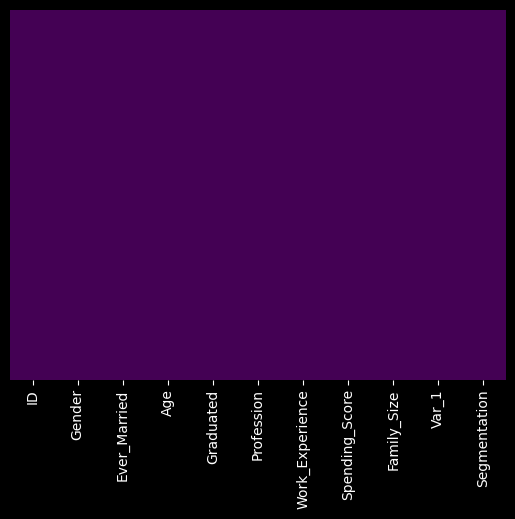

In [33]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot: >

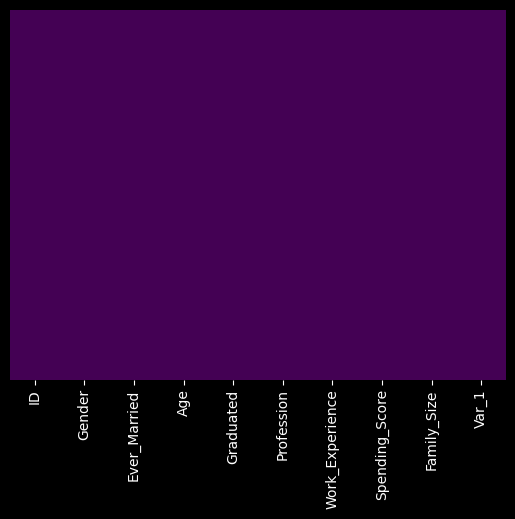

In [34]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
for i in train.columns:
    if train[i].dtype=='object':
        lbl=LabelEncoder()
        lbl.fit(list(train[i].values))
        train[i]=lbl.transform(list(train[i].values))
print(train.head(5))

for i in test.columns:
    if test[i].dtype=='object':
        lbl2=LabelEncoder()
        lbl2.fit(list(test[i].values))
        test[i]=lbl2.transform(list(test[i].values))
print(test.head(5))


       ID  Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
0  462809       1             0   22          0           5              1.0   
1  462643       0             1   38          1           2              3.0   
2  466315       0             1   67          1           2              1.0   
3  461735       1             1   67          1           7              0.0   
4  462669       0             1   40          1           3              3.0   

   Spending_Score  Family_Size  Var_1  Segmentation  
0               2          4.0      3             3  
1               0          3.0      3             0  
2               2          1.0      5             1  
3               1          2.0      5             1  
4               1          6.0      5             0  
       ID  Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
0  458989       0             1   36          1           2              0.0   
1  458994       1             1   3

In [36]:
train["Work_Experience"].fillna(int(train["Work_Experience"].mean()),inplace=True)
train["Family_Size"].fillna(int(train["Family_Size"].mean()),inplace=True)
test["Work_Experience"].fillna(int(test["Work_Experience"].mean()),inplace=True)
test["Family_Size"].fillna(int(test["Family_Size"].mean()),inplace=True)

In [37]:
train["Work_Experience"]= train["Work_Experience"].astype(int)
train["Family_Size"]= train["Family_Size"].astype(int)
test["Work_Experience"]= test["Work_Experience"].astype(int)
test["Family_Size"]= test["Family_Size"].astype(int)

In [38]:
train.drop(["ID"],axis=1,inplace=True)
test.drop(["ID"],axis=1,inplace=True)
test

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,2,0,2,1,5
1,1,1,37,1,5,8,0,4,5
2,0,1,69,0,0,0,2,1,5
3,1,1,59,0,4,11,1,2,5
4,0,0,19,0,8,3,2,4,5
...,...,...,...,...,...,...,...,...,...
2622,1,0,29,0,5,9,2,4,5
2623,0,0,35,1,1,1,2,1,5
2624,0,0,53,1,3,3,2,2,5
2625,1,1,47,1,4,1,1,5,3


In [39]:
X = train.iloc[:, :9]
y = train.iloc[:, -1]


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Logistic Regression classifier
clf = LogisticRegression()

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4826517967781908


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Logistic Regression classifier
clf = RandomForestClassifier()

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.476456009913259


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Logistic Regression classifier
clf = DecisionTreeClassifier()

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.42874845105328374


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Logistic Regression classifier
clf = SVC(kernel='rbf', gamma='auto', decision_function_shape='ovr')

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5291201982651796


Accuracy: 0.4888475836431227


In [51]:
testD = pd.read_csv('test.csv')
result1 = testD["ID"]
result2 = pd.DataFrame(lbl.inverse_transform(clf.predict(test)), columns=["Segmentation"])
result = pd.concat([result1, result2], axis=1)

c:\Users\sohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [55]:
result.to_csv("submission.csv", index=False)